In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [6]:
exchange_rates.rename(columns={'[Brazilian real ]': 'BR_real',
                               '[US dollar ]':'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
exchange_rates = exchange_rates[exchange_rates['BR_real'] != '-']
exchange_rates = exchange_rates[exchange_rates['US_dollar'] != '-']

In [8]:
exchange_rates['US_dollar'] = exchange_rates['US_dollar'].astype(float)
exchange_rates['BR_real'] = exchange_rates['BR_real'].astype(float)

In [9]:
exchange_rates['US_dollar_to_BR_real'] = exchange_rates['BR_real']/exchange_rates['US_dollar']

In [10]:
dollar_to_real = exchange_rates[['Time','US_dollar_to_BR_real']]

In [11]:
dollar_to_real['rolling_mean'] = dollar_to_real['US_dollar_to_BR_real'].rolling(30).mean()

<ipython-input-11-31a8646b6de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dollar_to_real['rolling_mean'] = dollar_to_real['US_dollar_to_BR_real'].rolling(30).mean()


In [12]:
dollar_to_real.dropna(inplace = True)

<ipython-input-12-cf154b6adad7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dollar_to_real.dropna(inplace = True)


In [20]:
pres_brasil = dollar_to_real.copy()
fhc = pres_brasil.copy()[pres_brasil['Time'].dt.year < 2002]
lula = pres_brasil.copy()[(pres_brasil['Time'].dt.year >= 2002) & (pres_brasil['Time'].dt.year < 2010)]
dilma = pres_brasil.copy()[(pres_brasil['Time'].dt.year >= 2010) & (pres_brasil['Time'] < '2016-09-01')]
temer = pres_brasil.copy()[(pres_brasil['Time'] >= '2016-09-01') & (pres_brasil['Time'].dt.year < 2018)]
bolso = pres_brasil.copy()[(pres_brasil['Time'].dt.year >= 2018)]

<ipython-input-125-bf5a57e73208>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['jan-00','','','jan-01','','','dez-01'],


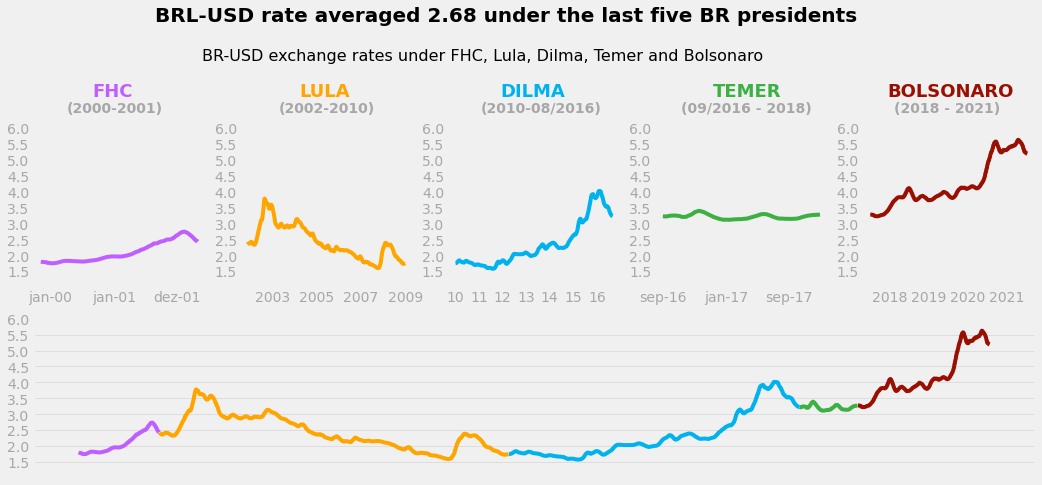

In [125]:
import matplotlib.style as style
style.use('fivethirtyeight')
### Adding the subplots
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2,5,1)
ax2 = plt.subplot(2,5,2)
ax3 = plt.subplot(2,5,3)
ax4 = plt.subplot(2,5,4)
ax5 = plt.subplot(2,5,5)
ax6 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for ax in axes:
    ax.set_ylim(1.00, 6.00)
    ax.set_yticks([1.0, 1.5, 2.0,2.5, 3.0,3.5, 4.0,4.5, 5.0,5.5, 6.0])
    ax.set_yticklabels(['','1.5', '2.0','2.5','3.0','3.5','4.0','4.5','5.0','5.5','6.0'],alpha=0.3)
    ax.grid(alpha=0.5)    
    
### Ax1: FHC
ax1.plot(fhc['Time'], fhc['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['jan-00','','','jan-01','','','dez-01'],
                   alpha=0.3)
ax1.text(11230, 7, 'FHC', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(11120, 6.5, '(2000-2001)', weight='bold',
        alpha=0.3)

### Ax2: Lula
ax2.plot(lula['Time'], lula['rolling_mean'],
        color='#ffa500')
ax2.set_xticks([11734,12145,12556,12966,13377,13788,14199,14610])
ax2.set_xticklabels(['','2003','','2005','','2007','','2009'],
                   alpha=0.3)
ax2.text(12650, 7, 'LULA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(12250, 6.5, '(2002-2010)', weight='bold',
        alpha=0.3)
  
### Ax3: Dilma
ax3.plot(dilma['Time'], dilma['rolling_mean'],
        color='#00B2EE')
ax3.set_xticks([14610,14975,15340,15705,16070,16436,16801])
ax3.set_xticklabels(['10','11','12','13','14','15','16'],
                   alpha=0.3)
ax3.text(15300, 7, 'DILMA', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(15000, 6.5, '(2010-08/2016)', weight='bold',
        alpha=0.3)

### Ax4: Temer
ax4.plot(temer['Time'], temer['rolling_mean'],
        color='#3cb043')
ax4.set_xticks([17045,17142,17240,17337,17434,17532])
ax4.set_xticklabels(['sep-16','','jan-17','','sep-17',''],
                   alpha=0.3)
ax4.text(17200, 7, 'TEMER', fontsize=18, weight='bold',
        color='#3cb043')
ax4.text(17100, 6.5, '(09/2016 - 2018)', weight='bold',
        alpha=0.3)

### Ax5: Bolso
ax5.plot(bolso['Time'], bolso['rolling_mean'],
        color='#990f02')
ax5.set_xticks([17532,17669,17806,17943,18080,18217,18354,18491,18628])
ax5.set_xticklabels(['','2018','','2019','','2020','','2021',''],
                alpha=0.3)
ax5.text(17650, 7, 'BOLSONARO', fontsize=18, weight='bold',
        color='#990f02')
ax5.text(17700, 6.5, '(2018 - 2021)', weight='bold',
        alpha=0.3)

#Todos

ax6.plot(fhc['Time'], fhc['rolling_mean'],
        color='#BF5FFF')
ax6.plot(lula['Time'], lula['rolling_mean'],
        color='#ffa500')
ax6.plot(dilma['Time'], dilma['rolling_mean'],
        color='#00B2EE')
ax6.plot(temer['Time'], temer['rolling_mean'],
        color='#3cb043')
ax6.plot(bolso['Time'], bolso['rolling_mean'],
        color='#990f02')
ax6.grid(alpha=0.5)
ax6.set_xticks([])

### Adding a title and a subtitle
ax1.text(11500.0, 9.35, 'BRL-USD rate averaged 2.68 under the last five BR presidents',
         fontsize=20, weight='bold')
ax1.text(11700.0, 8.14, '''BR-USD exchange rates under FHC, Lula, Dilma, Temer and Bolsonaro''',
        fontsize=16)

plt.show()